In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("dataset/merged/explo_dataset.csv")
df.dropna(axis=1, how="all", inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5256250 entries, 0 to 5256249
Data columns (total 12 columns):
MONTH                int64
DAY_OF_MONTH         int64
DAY_OF_WEEK          int64
UNIQUE_CARRIER       object
ORIGIN_AIRPORT_ID    int64
DEST_AIRPORT_ID      int64
CRS_DEP_TIME         int64
DEP_DELAY            int64
ARR_DELAY            int64
DISTANCE             float64
SHIFT                int64
NUM_WEEK             int64
dtypes: float64(1), int64(10), object(1)
memory usage: 481.2+ MB


In [4]:
for col in df:
    if df[col].dtype in ["int64", "float64"]:
        df[col] = df[col].astype("int32")

In [5]:
gen = (col for col in df)

In [6]:
c = next(gen)
print(c)
df[c].value_counts()

MONTH


8     467211
7     463480
5     462324
6     460267
3     457621
10    457378
9     441347
11    439545
12    432007
1     421751
2     403545
4     349774
Name: MONTH, dtype: int64

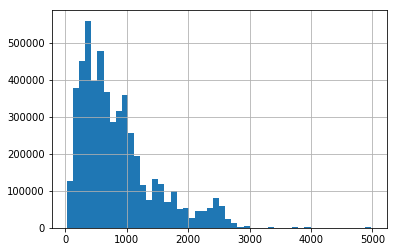

In [7]:
# Histogramme vol par distance
df["DISTANCE"].hist(bins=50)

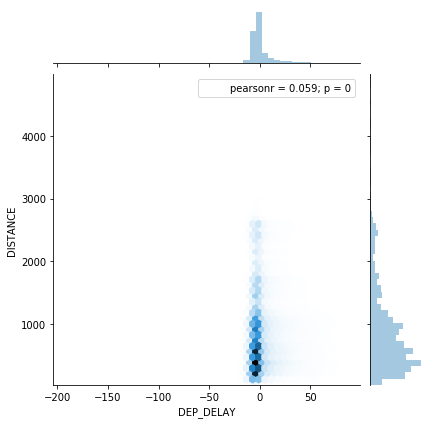

In [8]:
sub_df = df[df["DEP_DELAY"]<100][["DEP_DELAY", "DISTANCE"]]
plt.figure(figsize=(12,12))
sns.jointplot(x="DEP_DELAY", y="DISTANCE", data=sub_df, kind="hex")
plt.show()

### Retard au depart par companies

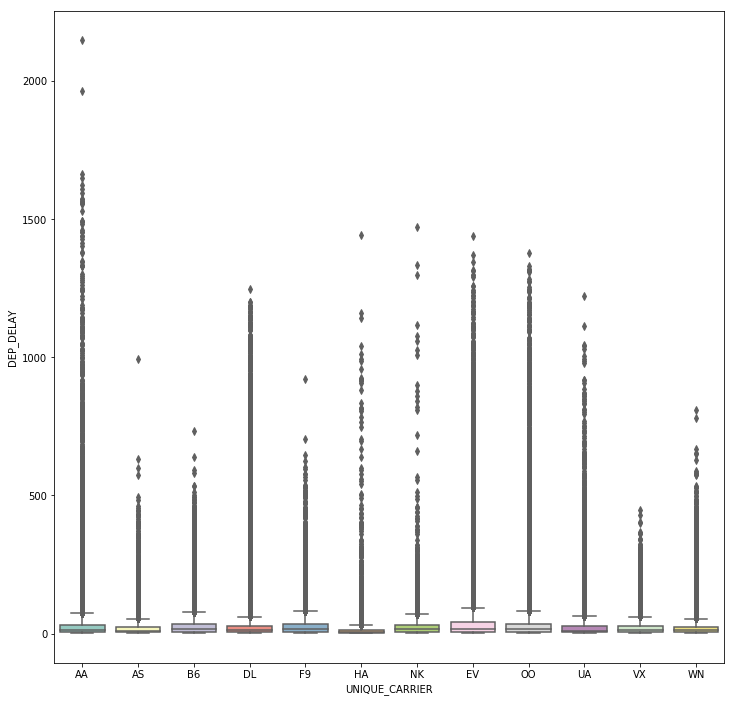

In [9]:
sub_df = df[df["DEP_DELAY"]>0][["UNIQUE_CARRIER", "DEP_DELAY"]]
plt.figure(figsize=(12,12))
sns.boxplot(x="UNIQUE_CARRIER", y="DEP_DELAY", data=sub_df, palette="Set3")
plt.show()

### Retard à l'arrivé par companies

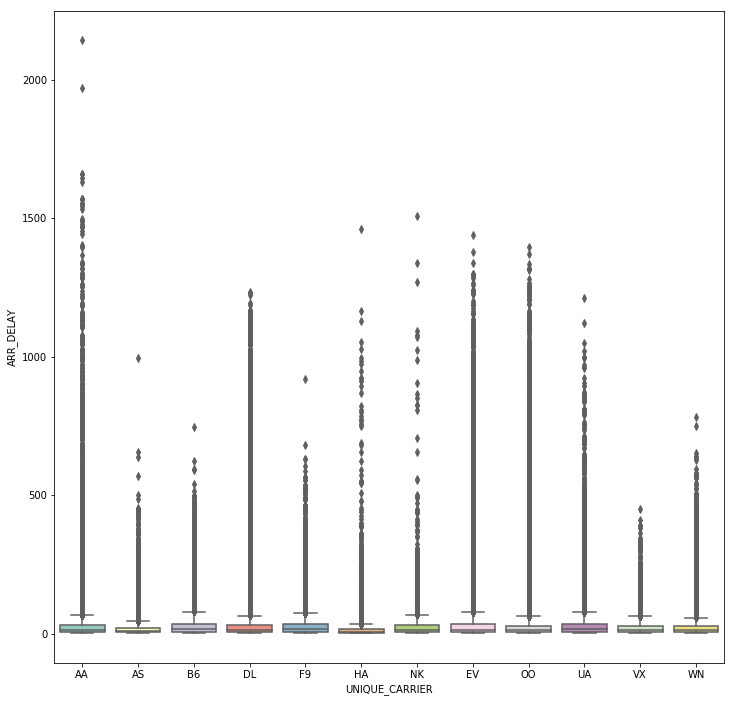

In [10]:
sub_df = df[df["ARR_DELAY"]>0][["UNIQUE_CARRIER", "ARR_DELAY"]]
plt.figure(figsize=(12,12))
sns.boxplot(x="UNIQUE_CARRIER", y="ARR_DELAY", data=sub_df, palette="Set3")
plt.show()

### Temps recup sur le retard par companies

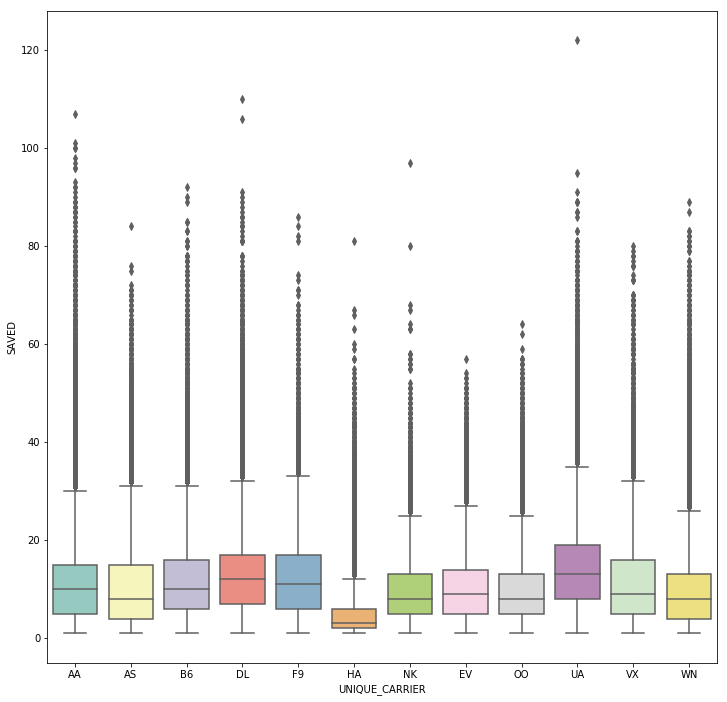

In [11]:
sub_df = df[df["ARR_DELAY"]<df["DEP_DELAY"]][["UNIQUE_CARRIER", "ARR_DELAY", "DEP_DELAY"]]
sub_df["SAVED"] = df["DEP_DELAY"] - df["ARR_DELAY"]
plt.figure(figsize=(12,12))
sns.boxplot(x="UNIQUE_CARRIER", y="SAVED", data=sub_df, palette="Set3")
plt.show()

## Retard "de gestion"

Retard n'incluant pas les retards due à des raisons de securité/meteo/NAS

In [12]:
#Ne fonctionne plus car la colonne CARRIER_DELAY a été retirée car inutile pour la regression

# sub_df = df[ (df["CARRIER_DELAY"]>0)  ][["UNIQUE_CARRIER", "ARR_DELAY"]]
# plt.figure(figsize=(12,12))
# sns.boxplot(x="UNIQUE_CARRIER", y="ARR_DELAY", data=sub_df, palette="Set3")
# plt.show()

## Retard au départ par aeroport

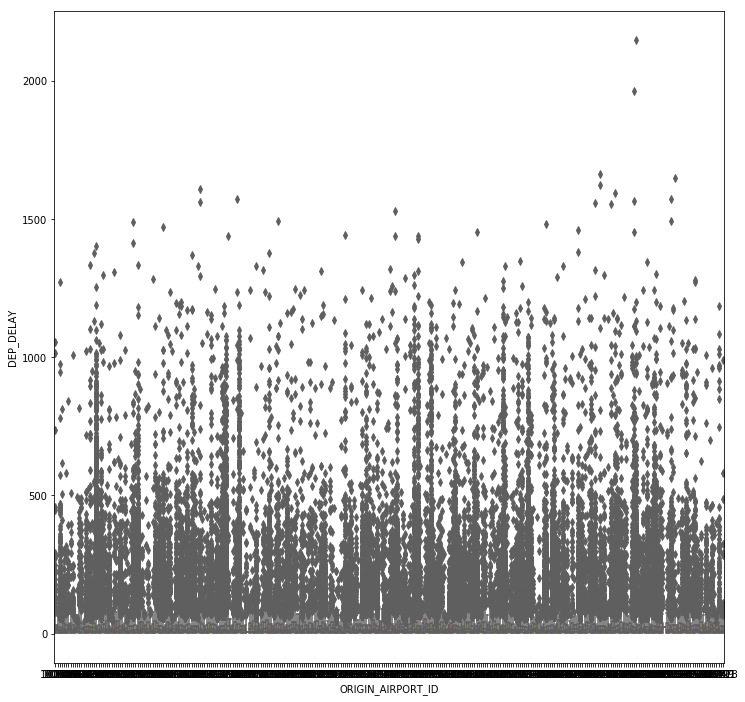

In [13]:
sub_df = df[df["DEP_DELAY"] > 0][["ORIGIN_AIRPORT_ID", "DEP_DELAY"]]
plt.figure(figsize=(12,12))
sns.boxplot(x="ORIGIN_AIRPORT_ID", y="DEP_DELAY", data=sub_df, palette="Set3")
plt.show()

## Retard à l'arrivé par aéroport

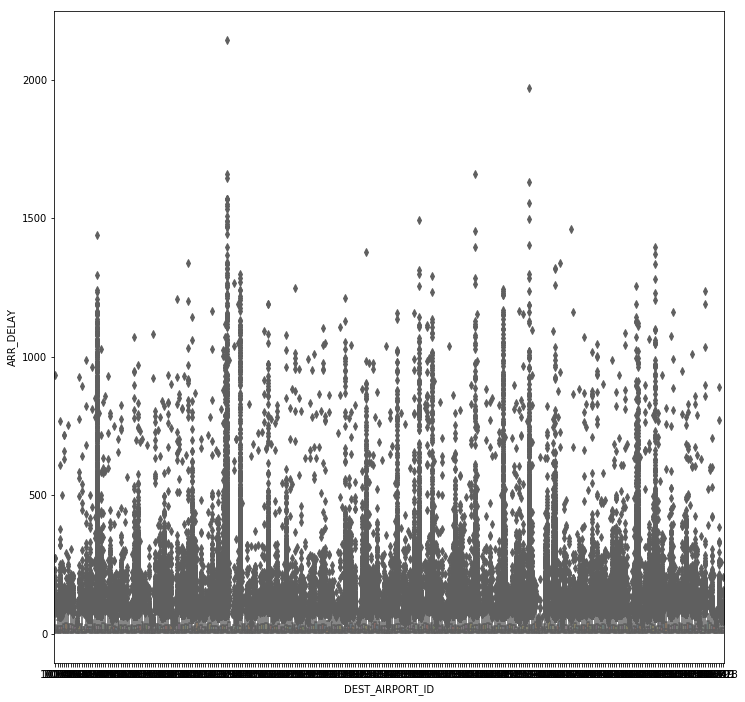

In [14]:
sub_df = df[df["ARR_DELAY"] > 0][["DEST_AIRPORT_ID", "ARR_DELAY"]]
plt.figure(figsize=(12,12))
sns.boxplot(x="DEST_AIRPORT_ID", y="ARR_DELAY", data=sub_df, palette="Set3")
plt.show()

## Segmentation des aeroport par retard 

In [4]:
print(len(df["DEST_AIRPORT_ID"].unique()))
print(len(df["ORIGIN_AIRPORT_ID"].unique()))
print(len(set(df["DEST_AIRPORT_ID"].unique()) | set(df["ORIGIN_AIRPORT_ID"].unique())))

310
311
311


In [5]:
df2 = df.groupby("ORIGIN_AIRPORT_ID")["ORIGIN_AIRPORT_ID", "DEP_DELAY"].mean()

In [6]:
df2

,ORIGIN_AIRPORT_ID,DEP_DELAY
ORIGIN_AIRPORT_ID,,
10135,10135.0,4.449423
10136,10136.0,2.360000
10140,10140.0,4.238400
10141,10141.0,3.272601
10146,10146.0,3.684869
10154,10154.0,7.034843
10155,10155.0,2.040755
10157,10157.0,3.871097
10158,10158.0,2.938959


In [7]:
quantiles = df2["DEP_DELAY"].quantile(q=[0.25,0.5,0.75])
d = quantiles.to_dict()

In [8]:
print(d)

{0.25: 0.60398882618672145, 0.5: 2.8805560636546552, 0.75: 4.5598605550751534}


In [9]:
def Score(x, d):
    if x <= d[0.25]:
        return 0.25
    elif x <= d[0.50]:
        return 0.5
    elif x <= d[0.75]: 
        return 0.75
    else:
        return 1

In [10]:
df2["RANK"] = df2["DEP_DELAY"].apply(Score, args=(quantiles,))

In [11]:
converter = df2.set_index('ORIGIN_AIRPORT_ID')["RANK"].to_dict()

In [12]:
# df['ORIGIN_AIRPORT_ID'] = df2['DEP_DELAY'].apply(Score)
# df['DEST_AIRPORT_ID'] = df['DEST_AIRPORT_ID'].apply(Score)

df['DEST_AIRPORT_ID'] = df['DEST_AIRPORT_ID'].apply(lambda x : converter[x])
df['ORIGIN_AIRPORT_ID'] = df['ORIGIN_AIRPORT_ID'].apply(lambda x : converter[x])

In [88]:
df

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_DELAY,ARR_DELAY,DISTANCE,SHIFT
0,1,6,3,AA,1.00,1.00,660,-3,-6,986.0,645
1,1,7,4,AA,1.00,1.00,660,-4,-12,986.0,645
2,1,8,5,AA,1.00,1.00,660,-5,7,986.0,645
3,1,9,6,AA,1.00,1.00,660,2,-5,986.0,645
4,1,11,1,AA,1.00,1.00,660,7,-3,986.0,645
5,1,12,2,AA,1.00,1.00,660,-1,0,986.0,645
6,1,13,3,AA,1.00,1.00,660,-5,-7,986.0,645
7,1,14,4,AA,1.00,1.00,660,-2,-10,986.0,645
8,1,15,5,AA,1.00,1.00,660,-4,-4,986.0,645
9,1,16,6,AA,1.00,1.00,660,-4,-15,986.0,645


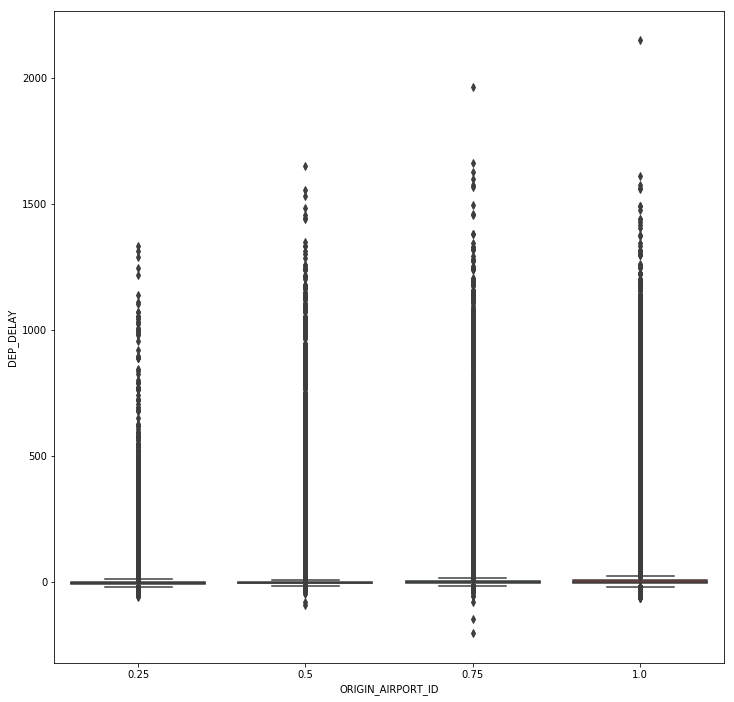

In [13]:
plt.figure(figsize=(12, 12))
sns.boxplot(x="ORIGIN_AIRPORT_ID", y="DEP_DELAY", data=df)
plt.show()

### Répartition du retard / heure de depart et jour dans la semaine

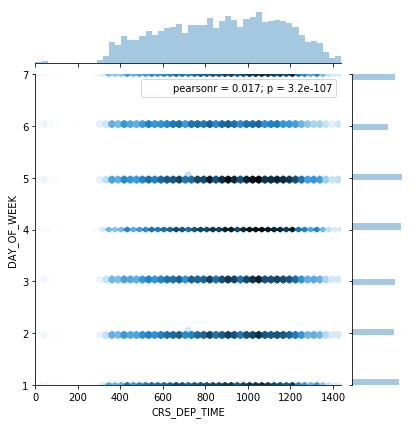

In [15]:
sub_df = df[df["DEP_DELAY"]>0][["CRS_DEP_TIME", "DAY_OF_WEEK"]]

plt.figure(figsize=(12,12))
sns.jointplot(x="CRS_DEP_TIME", y="DAY_OF_WEEK", data=sub_df, kind="hex")
plt.show()

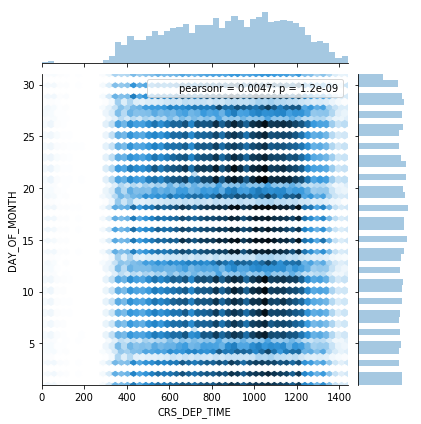

In [16]:
sub_df = df[df["DEP_DELAY"]>0][["CRS_DEP_TIME", "DAY_OF_MONTH"]]
# plt.figure(figsize=(12,12))
sns.jointplot(x="CRS_DEP_TIME", y="DAY_OF_MONTH", data=sub_df, kind="hex")
# plt.show()

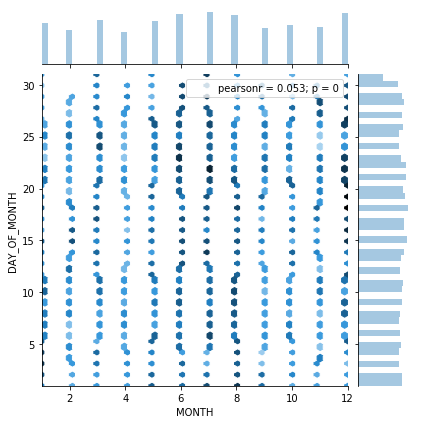

In [17]:
sub_df = df[df["DEP_DELAY"]>0][["DAY_OF_MONTH", "MONTH"]]
# plt.figure(figsize=(12,12))
# sns.jointplot(x="DAY_OF_MONTH", y="MONTH", data=sub_df, kind="hex")
# plt.show()
sns.jointplot(x="MONTH", y="DAY_OF_MONTH", data=sub_df, kind="hex")
#sub_df.plot.hexbin(x='DAY_OF_MONTH', y='MONTH', gridsize=25)

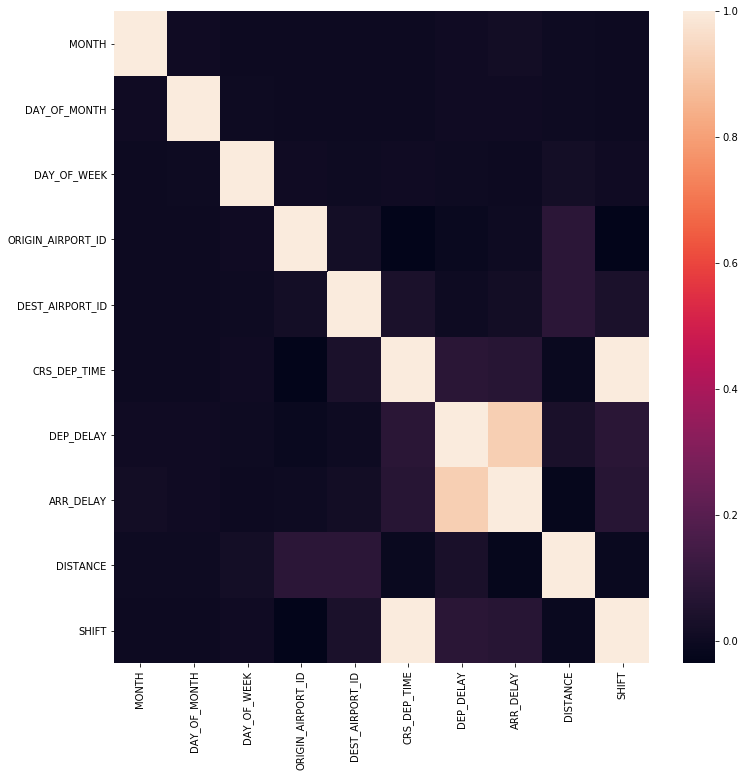

In [18]:
plt.figure(figsize=(12,12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix)
plt.show()

# Modification données post-exploration

In [19]:
df["CRS_DEP_TIME"] = df["CRS_DEP_TIME"].apply(lambda x:x//15)

In [32]:
df = df[(df["CRS_DEP_TIME"] >= 20) & (df["CRS_DEP_TIME"] <= 90)]

In [ ]:
plt.figure(figsize=(16,12))
ax = sns.violinplot(x="CRS_DEP_TIME", y="DEP_DELAY", data=df)
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i%2==1:
        xticks[i].set_visible(False)
plt.show()

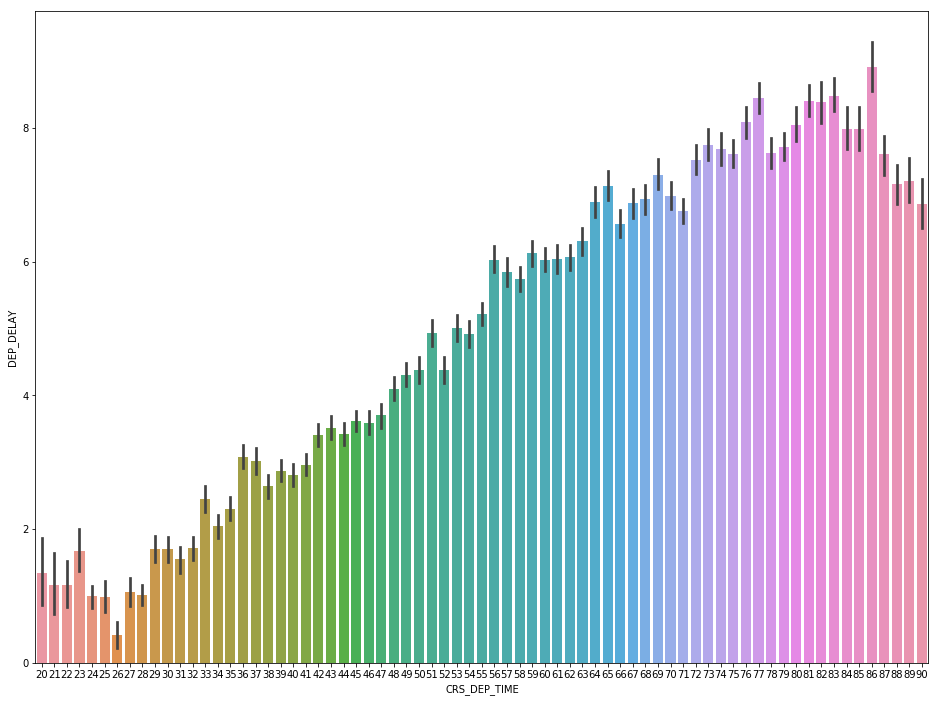

In [33]:
plt.figure(figsize=(16,12))
sns.barplot(x="CRS_DEP_TIME", y="DEP_DELAY", data=df)
plt.show()

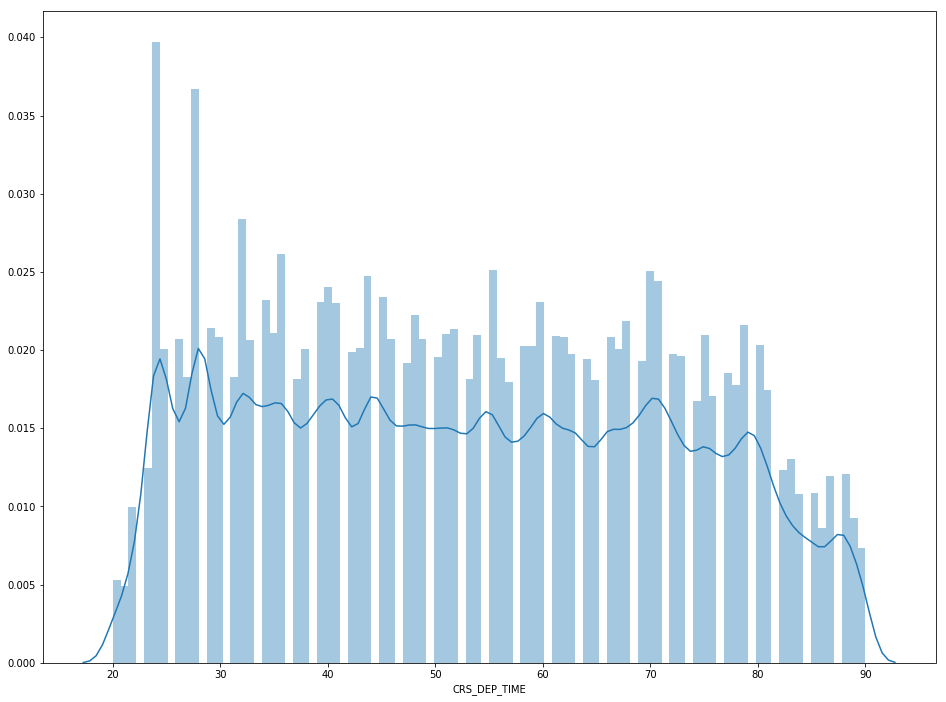

In [34]:
plt.figure(figsize=(16,12))
sns.distplot(df["CRS_DEP_TIME"], bins=96)
plt.show()

In [35]:
df["CRS_DEP_TIME"].median()
df["SHIFT"] = (df["CRS_DEP_TIME"] - 15).abs()

C:\Anaconda501\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


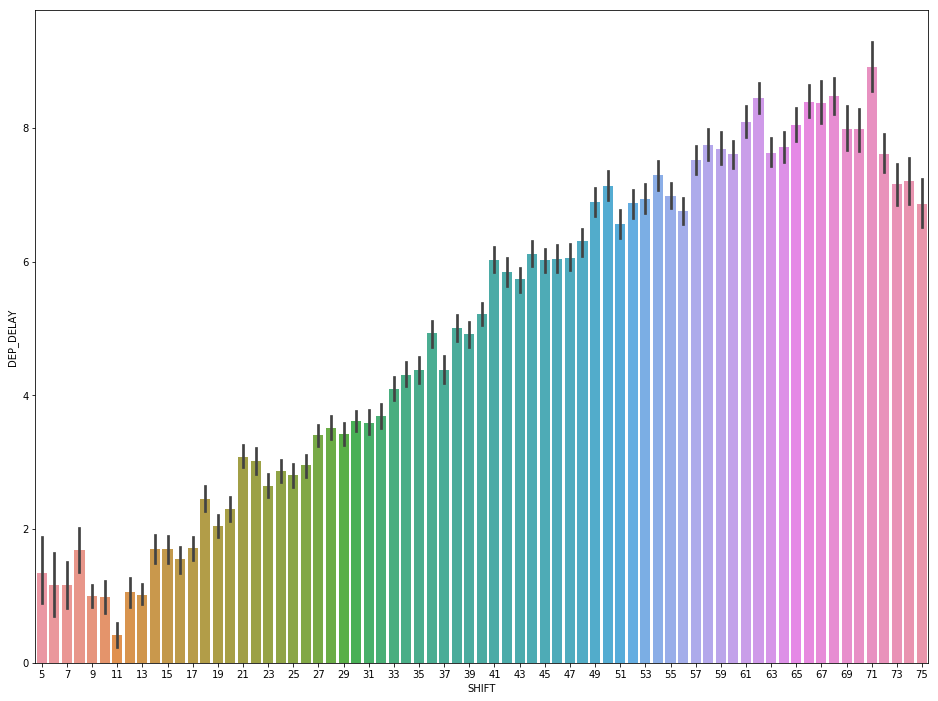

In [36]:
plt.figure(figsize=(16,12))
ax = sns.barplot(x="SHIFT", y="DEP_DELAY", data=df)
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i%2==1:
        xticks[i].set_visible(False)
plt.show()

In [25]:
plt.figure(figsize=(16,12))
ax = sns.barplot(x="NUM_WEEK", y="DEP_DELAY", data=df)
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i%2==1:
        xticks[i].set_visible(False)
plt.show()

ValueError: Could not interpret input 'NUM_WEEK'

In [ ]:
plt.figure(figsize=(16,12))
ax = sns.barplot(x="DAY_OF_WEEK", y="DEP_DELAY", data=df)
plt.show()

In [ ]:
# df.to_csv("dataset/merged/prod_dataset.csv", index=False)